<a href="https://colab.research.google.com/github/mkbybee/mkbybee/blob/main/BiomedicalSciences_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOMEDICAL SCIENCES - Python practicals 1: Plotting

---


# Creating simple plots

The goal of this practical is to learn how to create plots or figures in python. Good data visualisation is extremely important; it can help us better understand the data, and also helps us in communicating with others.

We will use a Python library called [Matplotlib](https://matplotlib.org/). It is a very flexible and powerful library. Have a look at their [gallery](https://matplotlib.org/stable/gallery/index.html) to get a feel for the many different types of visualisations that are possible with Matplotlib. At the end of the practical, we will also have a brief play with two other plotting libraries.

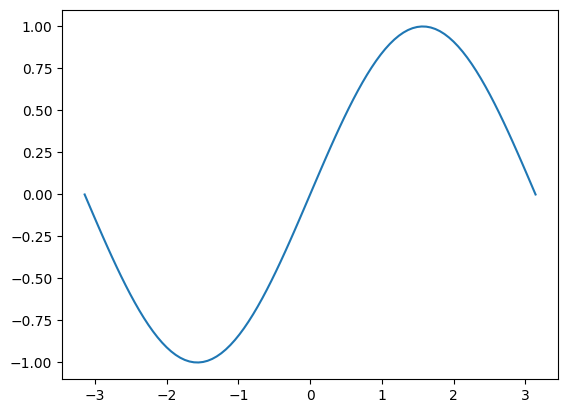

In [ ]:
# We start with the standard imports
import matplotlib.pyplot as plt
import numpy as np

# Let us plot a sine function

# define a vector with 100 entries between -pi and pi
x = np.linspace(-np.pi,np.pi,100)
# take the sine of x
y = np.sin(x)
# plot sine(x) against x
plt.plot(x,y)
# actually show the plot
plt.show()


If you know Matlab, the syntax should look quite familiar so far.

Next, we will change a few things in the plot. We will add labels to our two axes (always label your axes!), a title, and a grid. We will also change the width of the line and its colour.

We will do this in two ways. Both are completely valid, and as you will see give you the same outcome. The first is convenient if you don't want to type too much code.
The second is somewhat more flexible, although this may not be apparent in this simple example.

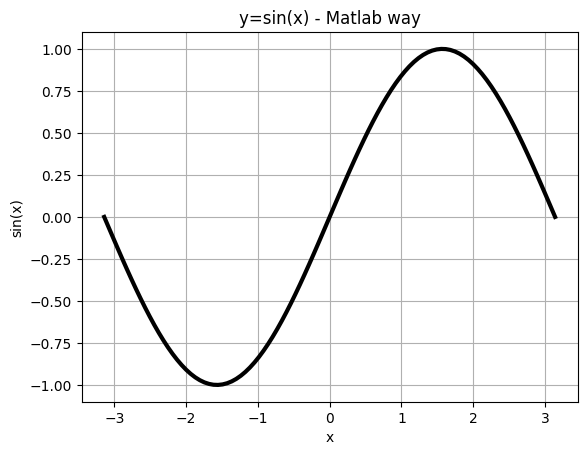

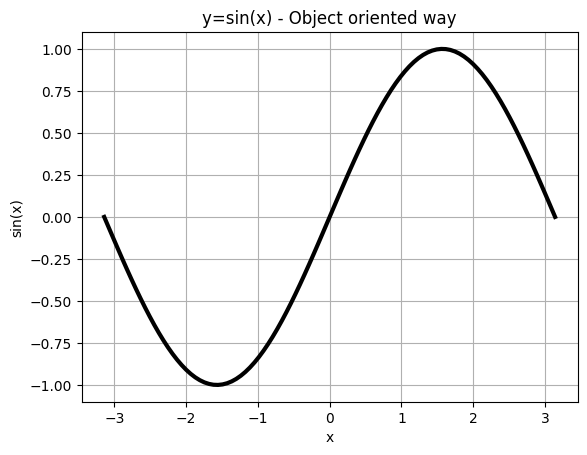

In [ ]:
# @title
# The Matlab way
plt.plot(x,y,linewidth=3,color='black')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('y=sin(x) - Matlab way')
plt.grid()
plt.show()

# The Object-oriented way
# Here, fig and axes are "Objects" returned by the "subplot" function
# we set the properties of the axes object using the "set" function
fig, axes = plt.subplots()
lines = axes.plot(x,y)
axes.set(xlabel='x',ylabel='sin(x)',title='y=sin(x) - Object oriented way')
axes.grid()
# "lines" is a list of objects returned by "plot". Here, it only contains
# one line which we access using lines[0]
lines[0].set(color='black',linewidth=3)
plt.show()


As you can see, the plots are identical. Now please attempt the below exercise. Make use of the help documentation (e.g. `plt.plot?`) to find out how it works. Don't look at the proposed solution until you have had a go yourself.

> **Exercise:** Modify the above plot in the following ways:
 - Make the line red
 - Make the text bigger in the title and labels (hint: type `plt.xlabel?` to get some help. You can also use Google!)
 - Add another line (in blue) showing the cosine of x
 - Add a legend for the two lines

> **Note: Don't hesitate to use Google to learn the syntax**

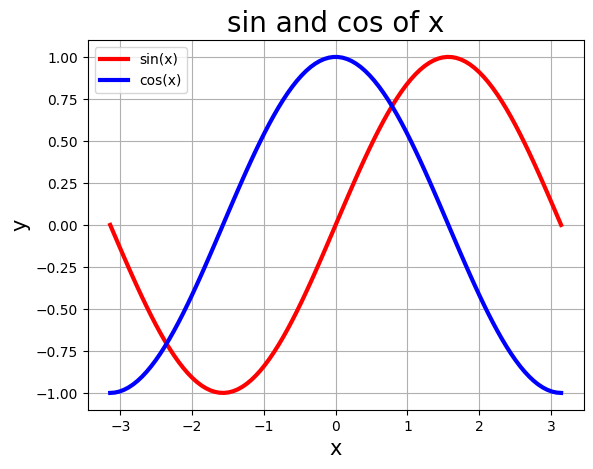

In [ ]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-np.pi,np.pi,num=100)
y_sin=np.sin(x)
y_cos=np.cos(x)
plt.plot(x,y_sin,color='red',linewidth=3,label='sin(x)')
plt.plot(x,y_cos,color='blue',linewidth=3,label='cos(x)')
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.grid()
plt.title("sin and cos of x",fontsize=20)
plt.legend()
plt.show()

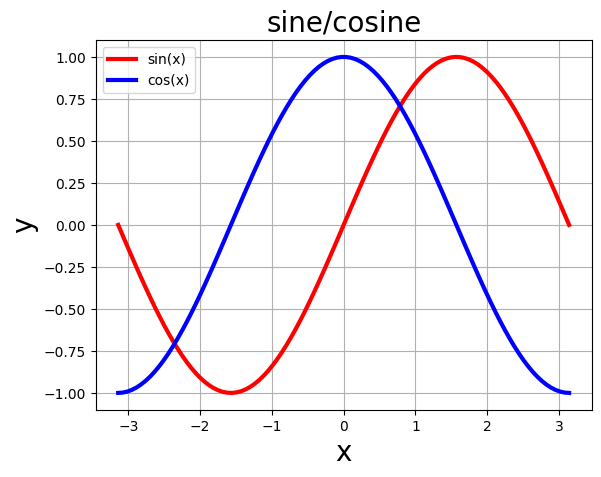

In [ ]:
#@title Possible Solution

# plotting the sine and cosine
# note the addition of the "label" property
# this will be used by the "legend" function later on
plt.plot(x,np.sin(x),linewidth=3,color='red',label='sin(x)')
plt.plot(x,np.cos(x),linewidth=3,color='blue',label='cos(x)')
# label the axes
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
# the legend function will look at the labels from the plot function
plt.legend()
# add a title as before
plt.title('sine/cosine',fontsize=20)
# add a grid
plt.grid()


# Plotting real data

We now turn to plotting real world data, which will also give us the opportunity to play with different types of plots.

I like to use Oxford weather data, which I originally found here: http://www.metoffice.gov.uk. Below we download a textfile of a cleaned up version of that data.

We will use [pandas](https://pandas.pydata.org), a very powerful library for analysing tabular data. But here we only use it to load the table. More on `pandas` in the 4th session (Data Analysis).




In [ ]:
import pandas as pd

table = pd.read_csv('https://raw.githubusercontent.com/sjbabdi/BiomedicalSciences/main/data/OxfordWeather.csv')
# peek at the table
table

,Year,Month,Maximum Temperature,Minimum Temperature,Air frost,Rainfall,Sunshine Duration
0,1929,1,3.7,-1.1,21,29.8,43.8
1,1929,2,3.3,-3.0,19,14.1,60.5
2,1929,3,12.9,-0.1,17,1.4,190.2
3,1929,4,11.8,2.5,6,34.3,144.7
4,1929,5,17.1,6.4,2,28.4,240.9
...,...,...,...,...,...,...,...
991,2011,8,20.7,11.4,0,65.6,157.8
992,2011,9,20.7,10.7,0,31.8,151.7
993,2011,10,17.2,9.5,0,26.3,0.6
994,2011,11,13.5,6.3,1,28.4,64.8




## Scatter plots

Let us begin with a plot of temperature against month of the year. We will take the average of the min and max tempratures as our measure of temperature.

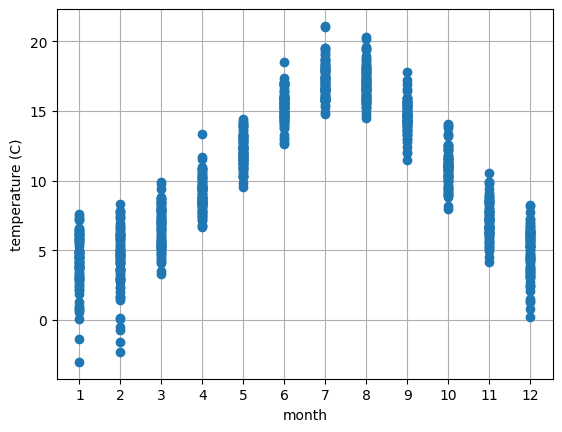

In [ ]:
from matplotlib.ticker import MultipleLocator
# average of min and max temp
temperature = (table['Maximum Temperature'] + table['Minimum Temperature'])/2
# months are labelled from 1 to 12
month       = table['Month']

# Prepare the plot
# note the 'o' means each data point (which corresponds to a given year and a given month)
# is plotted in isolation. If we don't have that
# the data will be plotted as a line and will look rather messy
plt.plot(month,temperature,'o')
plt.xlabel('month')
plt.ylabel('temperature (C)')
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.grid()
plt.show()

The inverted U shape should not surprise you. It would be easier to understand this plot if the x-axis was labelled using names of the month. For this we can use `plt.xticks`.

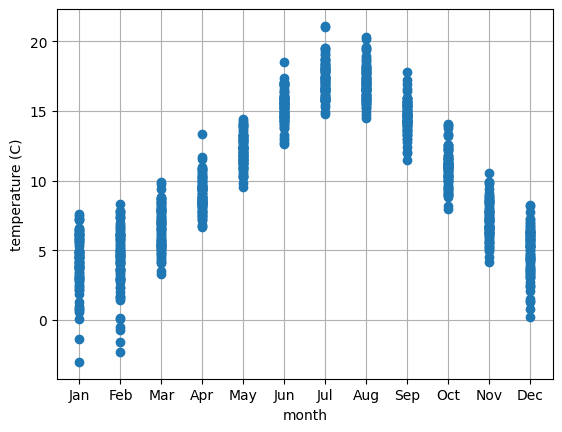

In [ ]:
# Display names of the month on the x-axis

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.plot(month,temperature,'o')
plt.xlabel('month')
plt.ylabel('temperature (C)')
plt.xticks(np.arange(1,13), month_names)
plt.grid()
plt.show()

It would be convenient to be able to directly read out, from the figure, the average temperature for each month. But it is hard to do now as the data points are all on top of one another.

> **Exercise**: Add the average temperature for each month to the plot, as a larger red point.

In [ ]:
# YOUR CODE HERE


In [ ]:
#@title Possible solution
# Create a list of average temperatures
avg_temp = [] # empty list for now
for m in np.arange(1,13):
  # only average over the same month
  avg_temp.append( np.mean(temperature[month==m]) )

# Note: a compact way to do the above in python uses list-comprehensions:
avg_temp = [ np.mean(temperature[month==m]) for m in np.arange(1,13) ]

# Now do the plotting
plt.plot(month,temperature,'o',markersize=2)
plt.plot(np.arange(1,13),avg_temp,'o',color='r',markersize=10)
plt.xlabel('month')
plt.ylabel('temperature (C)')
plt.xticks(np.arange(1,13), month_names)
plt.grid()
plt.show()



## Line plots
Next, we will look at rainfall. Let us plot the yearly rainfall in the years 2010 and 2011.



In [ ]:
# First we extract the data from the table
years     = table['Year']
rain_2010 = table['Rainfall'][years==2010]
rain_2011 = table['Rainfall'][years==2011]

# Now we prepare the plot
# Notice how I can use month_names directly for the xaxis
# So no need to use plt.xticks
plt.plot(month_names,rain_2010,'o-', label='2010')
plt.plot(month_names,rain_2011,'o-', label='2011')
# I can decide where to put the legend
plt.legend(loc = 'upper left')
# Always label the axes (although the xaxis is self-evident)
plt.ylabel('Rainfall (mm)')
plt.show()


I remember August 2010. It was not fun...


## Boxplots

Now we want to combine the rainfall data across all the years we have in the table so see if there is a pattern across the year. Does it tend to rain more in the Autumn, for example?

For this, we will use another type of plot called a `boxplot`, which combines information such as the median, the spread of the data, and the outliers (fliers):


![](https://github.com/sjbabdi/BiomedicalSciences/blob/main/data/boxplot.png?raw=1)


In [ ]:
# prepare the data
# we need a list of rainfall data, one per month
# let's use a compact list-comprehension for this
# we could also have used a loop instead
data = [ table['Rainfall'][table['Month'] == m] for m in  np.arange(1,13)]

# prepare the boxplot
# to make the figure larger, I can control the size with this command
plt.figure( figsize=(8,8))
plt.boxplot(data, labels=month_names)
plt.ylabel('Rainfall (mm)')
plt.show()


What can we conclude from this? I guess Febreuary seems to have the lowest rainfall, but over all it seems to rain pretty much the same amount all year...

> **Exercise**: Change the colours and widths of the components of the boxplot to make it look nicer. Look up the `plt.boxplot` documentation to find help. A proposed solution is shown below.


In [ ]:
# YOUR CODE HERE

In [ ]:
#@title Possible solution

# get the output of boxplot as a variable so we can modify it later
bp = plt.boxplot( data, labels=month_names, patch_artist=True, notch=True)

# change the colours of the medians (horizontal lines in the middle)
for m in bp['medians']:
  m.set( color='black', linewidth=3)

for w in bp['whiskers']:
  w.set( color='red', linewidth=1)

for b in bp['boxes']:
  b.set_facecolor('blue')
  b.set_alpha(.2) # sets the transparency
plt.grid()
plt.ylabel('Rainfall (mm)')
plt.show()


## Heatmaps

Next, we will look at all the columns of our table (excluding year and month), and quantify the correlation between the columns (i.e. how related they are).  Which variables do you expect to find to be highly correlated? Make a note of your guess before proceeding with the plotting.

In [ ]:
# First we create another table that excludes the first two columns:

variables      = table.to_numpy()[:,2:]
variable_names = list(table.columns[2:])

# Next, calculate the correlation matrix
corr = np.corrcoef(variables.T)

# Now we can show this matrix as a heat map
plt.imshow(corr)
plt.show()

This matrix shows the correlation between every pair of variables. To make sense of it, we need to add variable names in the x and y axes, a colourbar, and maybe even annotate the plot to show the numerical values inside the matrix:

In [ ]:

fig, ax = plt.subplots(figsize=(8,8))
im = plt.imshow(corr)

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(variable_names)), variable_names)
plt.yticks(np.arange(len(variable_names)), variable_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variable_names)):
    for j in range(len(variable_names)):
        text = plt.text(j, i, np.around(corr[i, j],decimals=2),ha="center", va="center", color="red")

# add a colourbar
plt.colorbar(label='correlation coefficient')
plt.show()


Look at the values in the plot. Do they correspond to your guess?

As an aside, you will notice that we have used quite a bit of code to create this plot. There is a very good Python library called [seaborn](https://seaborn.pydata.org) which makes creating this type of figures much easier and interacts nicely with `pandas`. So here is how to generate the same type of plot with `seaborn`:




In [ ]:
import seaborn

seaborn.heatmap(table.iloc()[:,2:].corr(),annot=True)
plt.show()

## Interactive plots

We will finish with an example of interactive plotting. Interactive means that you will be able to zoom in and out, hover over the plot and get more information about the data. It is extremely useful, and also very easy to do with modern Python libraries.

One of the most popular interactive plotting libraries is [Plotly](https://plotly.com/python). We use it below to create an interactive version of an earlier scatter plot we created. This time, you will be able to hover over the data to get more information.

Run the code below, make sure you understand it, and then interact with the figure. Feel free to play around with the `scatter` function to change the plot.


In [ ]:
import plotly.express as px

# Let's add a column to our table with actual month names
table['Month names'] = [ month_names[m-1] for m in table['Month']]

# In one call to the scatter function, look how many things we can set
px.scatter( table, x='Month names', y='Maximum Temperature', hover_data=['Year'], size='Rainfall', color='Air frost' )


#The End.